https://unit8co.github.io/darts/examples/03-FFT-examples.html

https://medium.com/unit8-machine-learning-publication/time-series-forecasting-using-past-and-future-external-data-with-darts-1f0539585993

In [1]:
pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 592.0/592.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 17.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - \ done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.2/238.2 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.8/187.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5

In [2]:
!pip install cloud-tpu-client==0.10 https://storage.googleapis.com/tpu-pytorch/wheels/torch_xla-1.9-cp37-cp37m-linux_x86_64.whl
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 torchtext==0.10.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html
!pip install pyyaml==5.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.9/149.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.4
    Uninstalling protobuf-3.19.4:
      Successfully uninstalled protobuf-3.19.4
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.9

In [3]:
#pip install darts
# necessary packages:
!pip install -U darts
#!pip install -U optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but 

In [4]:
#pip install missingno
#pip install darts

In [5]:
# fix python path if working locally
#from utils import fix_pythonpath_if_working_locally

#fix_pythonpath_if_working_locally()

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from darts import TimeSeries
from darts.models import FFT, AutoARIMA, ExponentialSmoothing, Theta
from darts.metrics import mae,rmse,mape,r2_score
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import GaussianLikelihood, QuantileRegression
from darts.explainability.shap_explainer import ShapExplainer
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    RegressionModel,
    TFTModel
)


import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/xla_device.py", line 32, in inner_f
    queue.put(func(*args, **kwargs))
  File "/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/xla_device.py", line 73, in _is_device_tpu
    return (xm.xrt_world_size() > 1) or bool(xm.get_xla_supported_devices("TPU"))
  File "/opt/conda/lib/python3.7/site-packages/torch_xla/core/xla_model.py", line 136, in get_xla_supported_devices
    xla_devices = _DEVICES.value
  File "/opt/conda/lib/python3.7/site-packages/torch_xla/utils/utils.py", line 32, in value
    self._value = self._gen_fn()
  File "/opt/conda/lib/python3.7/site-packages/torch_xla/core/xla_model.py", line 18, in <lambda>
    _DEVICES = xu.LazyProperty(lambda: torch_xla._XLAC._xla_get_devices())
RuntimeError: tensorflow/compiler/xla/xla_client/computation_client.cc:273 : Missing XLA configuration


In [7]:
D = pd.read_excel('/kaggle/input/norm-data-bcs/D_N.xlsx', index_col=0)
D.index = pd.to_datetime(D.index)
D

,f,Zc,pbh,pwh,q,fq,Zc.1,Pin,H,P,I,qc,5
1970-01-01 00:00:00.000000000,0.478298,0.184154,0.617864,0.375732,0.370196,0.478298,0.184154,0.636761,0.414506,0.325965,0.326323,0.392055,0.381900
1970-01-01 00:00:00.000000001,0.461469,0.200895,0.630114,0.355992,0.355298,0.461469,0.200895,0.647932,0.398012,0.311275,0.307947,0.391328,0.366410
1970-01-01 00:00:00.000000002,0.444640,0.217637,0.642126,0.334099,0.344745,0.444640,0.217637,0.667789,0.380750,0.297317,0.293839,0.384118,0.353947
1970-01-01 00:00:00.000000003,0.427811,0.234378,0.653255,0.312595,0.334114,0.427811,0.234378,0.666970,0.363340,0.282844,0.280244,0.371639,0.345734
1970-01-01 00:00:00.000000004,0.410982,0.251119,0.664258,0.291922,0.323031,0.410982,0.251119,0.679508,0.345110,0.270429,0.264677,0.367552,0.341089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000015995,0.583426,0.865214,0.436349,0.114131,0.563760,0.583426,0.865214,0.454569,0.492216,0.437500,0.439973,0.558000,0.561284
1970-01-01 00:00:00.000015996,0.583426,0.865214,0.436349,0.114131,0.563760,0.583426,0.865214,0.460063,0.489306,0.439301,0.438126,0.563280,0.552649
1970-01-01 00:00:00.000015997,0.583426,0.865214,0.436349,0.114131,0.563760,0.583426,0.865214,0.451113,0.488777,0.440847,0.441977,0.564708,0.556361
1970-01-01 00:00:00.000015998,0.583426,0.865214,0.436349,0.114131,0.563760,0.583426,0.865214,0.451801,0.487329,0.437968,0.439026,0.568589,0.562279


In [8]:
qs = D['q'].squeeze()
Pins = D['Pin'].squeeze()
Hs = D['H'].squeeze()
dts = TimeSeries.from_dataframe(D) 
dts

<TimeSeries (DataArray) (time: 16000, component: 13, sample: 1)>
array([[[0.47829816],
        [0.1841542 ],
        [0.61786441],
        ...,
        [0.32632286],
        [0.39205463],
        [0.38190034]],

       [[0.46146907],
        [0.20089549],
        [0.63011432],
        ...,
        [0.3079467 ],
        [0.39132802],
        [0.36640998]],

       [[0.44463998],
        [0.21763679],
        [0.64212555],
        ...,
...
        ...,
        [0.44197709],
        [0.56470759],
        [0.55636102]],

       [[0.58342644],
        [0.86521418],
        [0.43634869],
        ...,
        [0.43902569],
        [0.56858949],
        [0.56227862]],

       [[0.58342644],
        [0.86521418],
        [0.43634869],
        ...,
        [0.43873891],
        [0.56079836],
        [0.55858936]]])
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01 ... 1970-01-01T00:00:00.00001...
  * component  (component) <U4 'f' 'Zc' 'pbh' 'pwh' 'q' ... 'H' 'P' 'I' 'qc' '5'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

<Figure size 432x288 with 0 Axes>

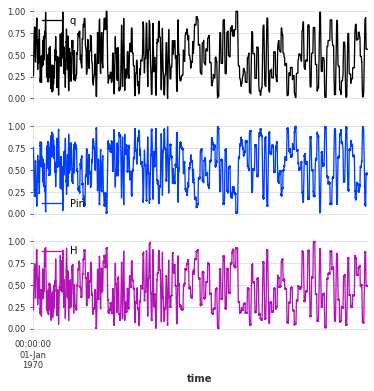

In [9]:
column_indices = {name: i for i, name in enumerate(D.columns)}
column_indices
n = len(D)
num_features = D.shape[1]

#train DATA
train_df = D[0:int(n)] #100% 
train_df = train_df.transpose()
train_df = train_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','f','Zc'])
train_df = train_df[:-1]
train_df = train_df.transpose()
train_df 
plt.figure() 
train_df.plot(subplots=True, figsize=(6, 6))


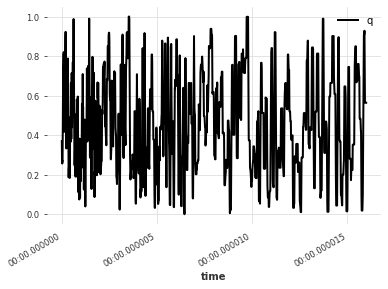

In [10]:
train_TS = TimeSeries.from_dataframe(train_df) 
train_TS
train_TS['q'].plot()

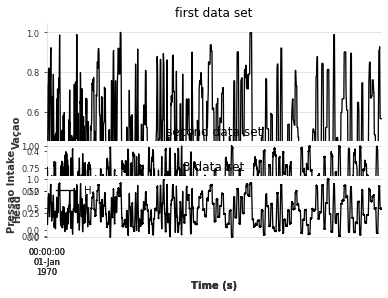

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
train_df['q'].plot()
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Vaçao')
ax1.set_title('first data set')
ax1.legend()
ax2 = fig.add_subplot(2, 1, 2)
train_df['Pin'].plot()
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Pressao Intake')
ax2.set_title('second data set')
ax2.legend()
ax3 = fig.add_subplot(3, 1, 3)
train_df['H'].plot()
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Head')
ax3.set_title('3 data set')
ax3.legend()
plt.show()

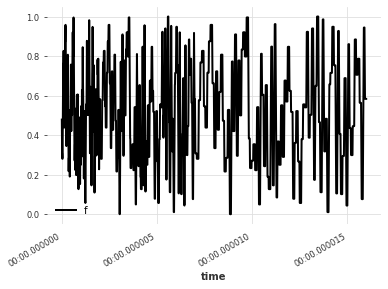

In [12]:
f_df = D[0:int(n)] #30%
f_df = f_df.transpose()
f_df = f_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','Zc','H','Pin','q'])
f_df = f_df[:-1]
f_df = f_df.transpose()
f_df
f_TS = TimeSeries.from_dataframe(f_df) 
f_TS.plot()

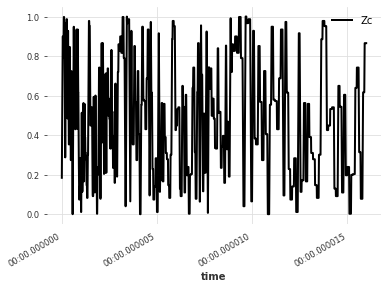

In [13]:
Zc_df = D[0:int(n)] #30%
Zc_df = Zc_df.transpose()
Zc_df = Zc_df.drop(['pbh','pwh','fq','Zc.1','I','qc','P','f','H','Pin','q'])
Zc_df = Zc_df[:-1]
Zc_df = Zc_df.transpose()
Zc_df
Zc_TS = TimeSeries.from_dataframe(Zc_df) 
Zc_TS.plot()

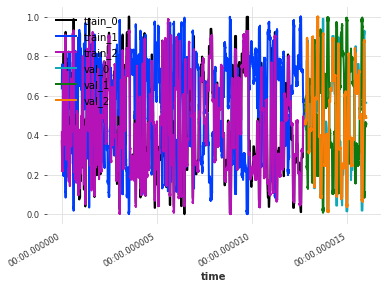

In [14]:
train, val = train_TS.split_before(0.8)
trainZc_TS, valZc_TS= Zc_TS.split_before(0.8)
trainf_TS, valf_TS= f_TS.split_before(0.8)
train.plot(label="train")
val.plot(label="val")

NameError: name 'pred_val' is not defined

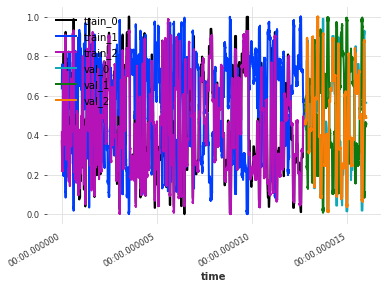

In [15]:
train.plot(label="train")
val.plot(label="val")
pred_val.plot(label="prediction")
print("MAE:", mae(pred_val, val))

In [ ]:
def eval_model(model, past_covariates=None, future_covariates=None):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, with a horizon of 10 steps:
    backtest = model.historical_forecasts(series=train_TS, 
                                          past_covariates=past_covariates,
                                          start=0.8, 
                                          retrain=False,
                                          verbose=False, 
                                          forecast_horizon=10)
    
    train_TS[-len(backtest)-100:].plot()
    backtest.plot(label='backtest (n=10)')
    print('Backtest RMSE = {}'.format(rmse(train_TS, backtest)))
    return backtest

In [ ]:
def predict_model(model,past_covariates=None, future_covariates=None):
    pred_series = model.predict(n=10,past_covariates=past_covariates)
    plt.figure(figsize=(8, 5))
    input_TS.plot(label="actual")
    pred_series.plot(label="forecast")
    plt.title("rmse: {:.2f}%".format(rmse(pred_series, target_val_input)))
    plt.legend()
    return pred_series

In [ ]:
brnn_no_cov.to_cpu()
brnn_no_cov.save("my_model_brnn_T1.pt")

In [ ]:
model_BRNN = BlockRNNModel.load("/kaggle/working/my_model_brnn_T1.pt")


In [ ]:
#eval_model(model_BRNN)
model_BRNN.backtest(train_TS, past_covariates=None, future_covariates=None, num_samples=1, train_length=None, start=None, forecast_horizon=1, stride=1, retrain=True, overlap_end=False, last_points_only=False, metric=<function mape>, reduction=<function mean>, verbose=False)

2 serie(f,Zc) like past covariates

In [ ]:


regr_model = RegressionModel(lags=[-4, -3, -2, -1],
                             lags_past_covariates=[-4, -3, -2, -1])

regr_model.fit(train_TS, past_covariates=f_TS.stack(Zc_TS))

Predict_RM = eval_model(regr_model)


In [ ]:
regr_model.save("my_model_regression.pkl")


In [ ]:
regr_model = RegressionModel.load("/kaggle/working/my_model_regression.pkl")

In [ ]:
#regr_model.residuals(train_TS, past_covariates=[-4, -3, -2, -1], forecast_horizon=1, retrain=True, verbose=False)
regr_model.extreme_lags


In [ ]:
regr_model.backtest(train_TS, past_covariates=[-4, -3, -2, -1] , num_samples=1, train_length=None, start=2, forecast_horizon=1, stride=1, retrain=True, overlap_end=False, last_points_only=False, metric= rmse, verbose=False)

In [ ]:
Pred_reg = eval_model(regr_model)

In [ ]:
model_BCS = NBEATSModel(
    input_chunk_length=10, 
    output_chunk_length=10, 
    n_epochs=200, 
    random_state=0,
    generic_architecture=False,
    num_stacks=10,
    num_blocks=6,
    num_layers=6,
    layer_widths=512,
    nr_epochs_val_period=1,
    batch_size=100,
    model_name="nbeats_run",
    pl_trainer_kwargs={"accelerator": "gpu", "devices": [0] }
)
    


In [ ]:
import torch.multiprocessing as mp


mp.multiprocessing.set_start_method('spawn')

In [ ]:
model_BCS.fit(train_TS,
              past_covariates= f_TS.stack(Zc_TS), 
              verbose=False,
              epochs = 600)

In [ ]:
Predict_NBEATS = eval_model(model_BCS)
model_BCS.save("NBEATSModel_bcs.pt")


In [ ]:
model_BCS.save("NB_Model_v1.pt")

In [ ]:
pred_series = model_BCS.predict(n=10)

In [ ]:
model_BRNN = BlockRNNModel.load("/kaggle/working/my_model_v1.pt")
model_TCM = TCNModel.load("/kaggle/working/my_model_TCN.pt")
model_NB = NBEATSModel.load("/kaggle/working/NB_Model_v1.pt")

In [ ]:
pred_series2 = eval_model(model_BCS)


In [ ]:
r2_score(train_TS, pred_series2)

In [ ]:
mae(train_TS, pred_series2)

In [ ]:
df_Model_NB = pred_series2.pd_dataframe()
#df_Model_NB.to_excel("pred_series2_Nbeats.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_3 = pd.merge(df_Model_NB, df_Target, on ='time')
df_M_3.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_3.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_3['q_err'] = df_M_3['q_Pred'] - df_M_3['q_Val']
df_M_3['Pin_err'] = df_M_3['Pin_Pred'] - df_M_3['Pin_Val']
df_M_3['H_err'] = df_M_3['H_Pred'] - df_M_3['H_Val']
df_M_3 =  df_M_3.reset_index(drop=True)
df_M_3


In [ ]:
#plot each series
plt.plot(df_M_3['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_3['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vazão Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('q (m^3/h)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_3['q_err'], label='Erro Vazao', color='blue')
# adding title to the plot
plt.title('Erro Vazao',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Erro Vazao',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_3['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-.20) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_3['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_3['H_Val'], label='H_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H (m)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_3['H_err'], label='Erro Head', color='blue')
# adding title to the plot
plt.title('Erro Head',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_3['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.20) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_3['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_3['Pin_Val'], label='Pin_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Pin (Pa)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_3['Pin_err'], label='Erro Pin', color='blue')
# adding title to the plot
plt.title('Erro Pressao Intake',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Pin',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_3), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_3['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-.2) #y-axis line
plt.show() 

In [ ]:
#shap_explain = ShapExplainer(NBS_model)
#shap_explain.summary_plot()

In [ ]:
my_model = BlockRNNModel(
    model="GRU",
    hidden_dim=20,
    dropout=0.2,
    batch_size=16,
    n_epochs=300,
    pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]},
    model_name="BCS_PinH_RNN",
    input_chunk_length=10,
    output_chunk_length=10, 
    force_reset=True,
)

In [ ]:
my_model.fit(train_TS,
            past_covariates= f_TS.stack(Zc_TS), 
            verbose=False,
            epochs = 600)

In [ ]:
Predict_RM = eval_model(my_model)

In [ ]:
Predict_RM

In [ ]:
r2_score(train_TS, Predict_RM)

In [ ]:
mae(train_TS, Predict_RM)

In [ ]:
my_model.save("my_model_v1_GRU.pt")

In [ ]:
df_Model_RM = Predict_RM.pd_dataframe()
df_Model_RM.to_excel("pred_series2_RNN80N.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_4 = pd.merge(df_Model_RM, df_Target, on ='time')
df_M_4.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_4.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_4['q_err'] = df_M_4['q_Pred'] - df_M_4['q_Val']
df_M_4['Pin_err'] = df_M_4['Pin_Pred'] - df_M_4['Pin_Val']
df_M_4['H_err'] = df_M_4['H_Pred'] - df_M_4['H_Val']
df_M_4 =  df_M_4.reset_index(drop=True)
df_M_4

In [ ]:
#plot each series
plt.plot(df_M_4['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_4['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vazao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Vazao (m^3/h)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_4['q_err'], label='Erro Vazao', color='blue')
# adding title to the plot
plt.title('Erro Vazao',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('q',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_4['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vazao')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-.20) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_4['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_4['H_Val'], label='H_Val', color='blue')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H (m)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linestyle='-', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_4['H_err'], label='Erro Head', color='blue')
# adding title to the plot
plt.title('Erro Head',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_4['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-.20) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_4['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_4['Pin_Val'], label='Pin_Val', color='blue')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Pressao (Pa)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_4['Pin_err'], label='Erro Pin', color='blue')
# adding title to the plot
plt.title('Erro Pressao Intake',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('Pin',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_4), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_4['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.2) #y-axis line
plt.show() 

In [ ]:
train_TS.width

In [ ]:
deeptcn.save("my_model_TCN.pt")

In [ ]:
deeptcn = TCNModel(
    input_chunk_length=15,
    output_chunk_length=10,
    kernel_size=2,
    num_filters=4,
    dilation_base=2,
    dropout=0.2,
    random_state=0,
    likelihood=GaussianLikelihood(),
    pl_trainer_kwargs={"accelerator": "gpu", "devices": [0]},
)

deeptcn.fit(train_TS, past_covariates=f_TS.stack(Zc_TS), verbose=False)


In [ ]:
Predict_TCM = eval_model(model_TCM)

In [ ]:
r2_score(train_TS, Predict_TCM)

In [ ]:
mae(train_TS, Predict_TCM)

In [ ]:
df_Model_TCM = Predict_TCM.pd_dataframe()
#df_Model_TCM.to_excel("pred_series3_TCM.xlsx")
df_Target = val.pd_dataframe()
df_Target 

#df_1.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5 = pd.merge(df_Model_TCM, df_Target, on ='time')
df_M_5.plot(subplots=True, figsize=(6, 6),x_compat=True)
df_M_5.rename(columns = {'q_x': 'q_Pred', 'Pin_x': 'Pin_Pred', 'H_x': 'H_Pred', 'q_y': 'q_Val', 'Pin_y': 'Pin_Val', 'H_y': 'H_Val'}, inplace = True)
df_M_5['q_err'] = df_M_5['q_Pred'] - df_M_5['q_Val']
df_M_5['Pin_err'] = df_M_5['Pin_Pred'] - df_M_5['Pin_Val']
df_M_5['H_err'] = df_M_5['H_Pred'] - df_M_5['H_Val']
df_M_5 =  df_M_5.reset_index(drop=True)
df_M_5

In [ ]:
#plot each series
plt.plot(df_M_5['q_Pred'], label='q_Pred', color='green')
plt.plot(df_M_5['q_Val'], label='q_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Vazao Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Vazao (m^3/h)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.05)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_5['q_err'], label='Erro Vazao', color='blue')
# adding title to the plot
plt.title('Erro Vazao',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (s)',fontsize=14)
plt.ylabel('q',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_5['q_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Vaçao')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_5['H_Pred'], label='H_Pred', color='green')
plt.plot(df_M_5['H_Val'], label='H_Val', color='blue', linestyle=':')
# adding title to the plot
plt.title('Head Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H (m)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend',bbox_to_anchor=(1,1))
plt.grid(color='r', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.plot(df_M_5['H_err'], label='Erro Head', color='blue')
# adding title to the plot
plt.title('Erro Head',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('H',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_5['H_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Head')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-.3) #y-axis line
plt.show() 

In [ ]:
#plot each series
plt.plot(df_M_5['Pin_Pred'], label='Pin_Pred', color='green')
plt.plot(df_M_5['Pin_Val'], label='Pin_Val', color='blue')
# adding title to the plot
plt.title('Pressao Intake Norm',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Pin (Pa)',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
plt.grid(color='r', linestyle='-', linewidth=1)
# setting x-axis values
plt.xticks(np.arange(0, 3192, 400))
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

In [ ]:
plt.hist(df_M_5['Pin_err'], label='Error_Pred', color='green')
# the histogram of the data
plt.title('Histogram of Error Pressao Intake')
plt.grid(True)
plt.axhline(0) #x-axis line
plt.axvline(-0.3) #y-axis line
plt.show() 

In [ ]:
plt.plot(df_M_5['Pin_err'], label='Erro Pin', color='blue')
# adding title to the plot
plt.title('Erro Pressao Intake',fontsize=14)
# adding Label to the x-axis
plt.xlabel('Time (sample)',fontsize=14)
plt.ylabel('Pin',fontsize=14)
# adding legend to the curve
plt.legend(title='Legend', bbox_to_anchor=(1,1))
#display plot
plt.grid(color='r', linestyle='-', linewidth=.5)
# setting x-axis values
plt.xticks(np.arange(0, len(df_M_5), 400))
plt.tight_layout()
plt.axhline(0) #x-axis line
plt.axvline(0) #y-axis line
plt.show()

TFF like ESN
https://unit8co.github.io/darts/examples/13-TFT-examples.html

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 10
forecast_horizon = 10

my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [ ]:
my_model.fit(train_TS, past_covariates = f_TS.stack(Zc_TS), future_covariates = f_TS.stack(Zc_TS), verbose=False)

In [ ]:
def eval_model(model, n, actual_series, val_series):
    num_samples = 10
    pred_series = model.predict(n=n, num_samples=num_samples)

    # plot actual series
    plt.figure(figsize=figsize)
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=lowest_q, high_quantile=highest_q, label=label_q_outer
    )
    pred_series.plot(low_quantile=low_q, high_quantile=high_q, label=label_q_inner)

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()
    return pred_series



In [ ]:
pred_seriesTFN = eval_model(my_model, 10, train, val)